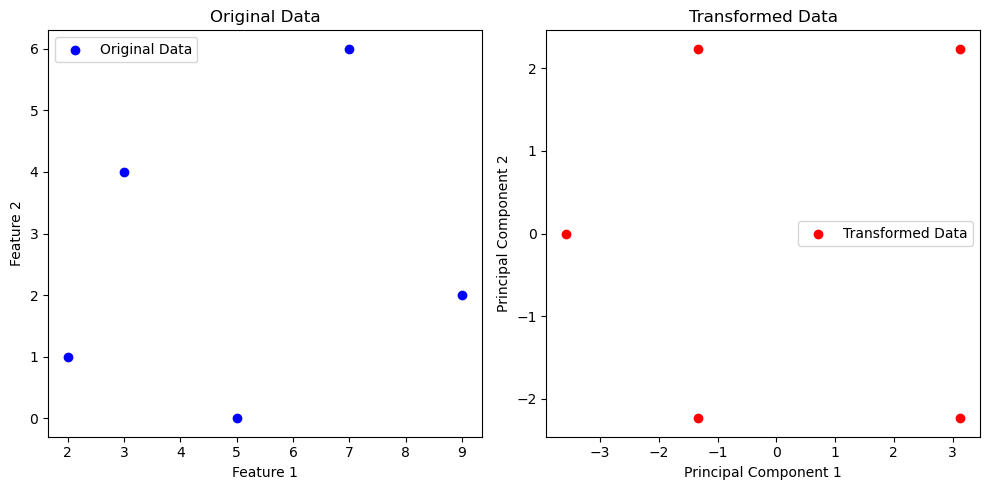

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data matrix
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

# Calculate the mean of each feature
mean = np.mean(data, axis=0)

# Center the data
centered_data = data - mean

# Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Choose the top 2 eigenvectors (k=2 for 2D transformation)
top_eigenvectors = eigenvectors[:, :2]

# Project the data onto the new subspace
transformed_data = np.dot(centered_data, top_eigenvectors)

# Plot scatter plot of original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot scatter plot of transformed data
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='red', label='Transformed Data')
plt.title('Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


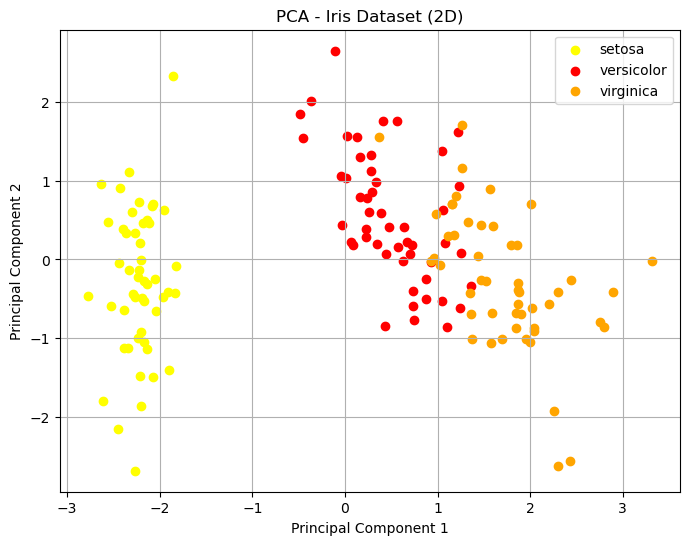

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

# Compute covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Compute eigenvalues and eigenvectors of covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Choose the top k eigenvectors (k=2 for 2D transformation)
k = 2
top_eigenvectors = eigenvectors[:, :k]

# Project the data onto the new subspace
transformed_data = np.dot(X_standardized, top_eigenvectors)

# Plot scatter plot with different colors for different classes
plt.figure(figsize=(8, 6))
colors = ['yellow', 'red', 'orange']
for i in range(3):
    plt.scatter(transformed_data[y == i, 0], transformed_data[y == i, 1], color=colors[i], label=iris.target_names[i])

plt.title('PCA - Iris Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
